In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##1.1 모델 읽기

In [2]:
from keras.models import load_model
model_path = '/content/drive/MyDrive/Colab Notebooks/Lec8_DeepLearning/2021_08_19_이미지분석2/models/mnist_v1.h5'
model = load_model(model_path)

##1.2 이미지 읽기

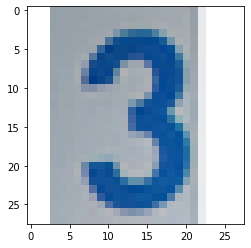

In [3]:
import cv2
import matplotlib.pyplot as plt

img_path = '/content/drive/MyDrive/Colab Notebooks/Lec8_DeepLearning/2021_08_19_이미지분석2/models/3.png'
img = cv2.imread(img_path)
plt.imshow(img)

#2. 예측하기

##2.1 단색 변환

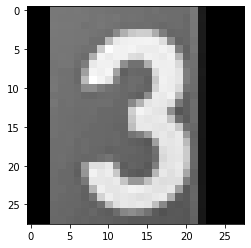

In [5]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

plt.imshow(img_gray, cmap=plt.cm.binary)
plt.show()

##2.2 차원 축소

In [6]:
img_gray.shape

(28, 28)

In [7]:
img_gray_reshape = img_gray.reshape(1, 28*28)
img_gray_reshape = img_gray_reshape.astype('float32')/255

##2.3 예측 하기

In [10]:
import pandas as pd

pred = model.predict(img_gray_reshape)

s = pd.Series(pred[0])
s.sort_values(ascending=False)

2    1.0
9    0.0
8    0.0
7    0.0
6    0.0
5    0.0
4    0.0
3    0.0
1    0.0
0    0.0
dtype: float32

> 기존의 학습한 데이터는 숫자가 검은색으로 쓰여있고 배경이 흰색이었다.
그러나 이 숫자는 배경이 검은색이라 인식률이 떨어진다.

> 따라서 이미지에 색 반전을 진행해야 하낟.

##2.4 숫자 색 치환

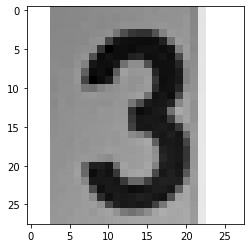

In [13]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
reverse_img_gray = 255 - img_gray

plt.imshow(reverse_img_gray, cmap=plt.cm.binary)
plt.show()

In [15]:
img_gray_reshape = reverse_img_gray.reshape(1, 28*28)
img_gray_reshape = img_gray_reshape.astype('float32')/255

import pandas as pd

pred = model.predict(img_gray_reshape)

s = pd.Series(pred[0])
s.sort_values(ascending=False)

3    9.999959e-01
2    4.025385e-06
7    1.950130e-08
6    1.585047e-13
5    1.195807e-15
8    5.344729e-19
0    1.956048e-20
9    2.574724e-24
1    2.495756e-32
4    0.000000e+00
dtype: float32